# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt

In [2]:
grades_df = pd.read_csv('../1 - DataAcquisition/raw_data/df_players_grades_post_integration.csv')
grades_df.head()

,api_player_id,player_name,normalized_player_name,team_name,role,grade,fantagrade,goals_scored,goals_conceded,autogoals,penalties_scored,penalties_missed,penalties_saved,assists,player_of_the_match,season,matchday
0,NaN,Musso,Musso,Atalanta,Goalkeeper,6.5,6.5,0,0,0,0,0,0,0,0,2023/24,1
1,2286.0,D. Zappacosta,Zappacosta,Atalanta,Defender,6.5,6.5,0,0,0,0,0,0,0,0,2023/24,1
2,30421.0,B. Djimsiti,Djimsiti,Atalanta,Defender,6.0,6.0,0,0,0,0,0,0,0,0,2023/24,1
3,1442.0,S. Kolašinac,Kolasinac,Atalanta,Defender,6.5,6.5,0,0,0,0,0,0,0,0,2023/24,1
4,128461.0,N. Zortea,Zortea,Atalanta,Defender,7.0,10.0,1,0,0,0,0,0,0,0,2023/24,1


In [3]:
stats_df = pd.read_csv('../1 - DataAcquisition/raw_data/cleaned_stats.csv', index_col = 0)
stats_df

,player_id,name,team_id,team_name,league_id,league_name,appereances,lineups,minutes,sub_in,...,attempted_dribbles,won_dribbles,drawn_fouls,committed_fouls,yellow_cards,yellowred_cards,red_cards,scored_penalties,missed_penalties,saved_penalties
0,105,F. Ballo-Touré,36,Fulham,39,Premier League,6,0,66,6,...,5.0,3.0,2.0,4.0,1,0,0,0.0,0.0,NaN
11,305,D. Origi,65,Nottingham Forest,39,Premier League,20,6,598,14,...,21.0,9.0,8.0,14.0,1,0,0,0.0,0.0,NaN
17,765,A. Mirante,489,AC Milan,135,Serie A,2,2,178,0,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0
22,2045,S. Kjær,489,AC Milan,135,Serie A,20,14,1172,6,...,NaN,NaN,2.0,9.0,1,0,0,0.0,0.0,NaN
28,31054,R. Krunić,611,Fenerbahce,203,Süper Lig,12,9,774,3,...,5.0,4.0,12.0,11.0,0,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,109806,D. Flakus Bosilj,199,De Graafschap,89,Eerste Divisie,37,19,2063,18,...,30.0,3.0,25.0,18.0,2,0,0,0.0,0.0,NaN
3883,180128,S. Mitrović,504,Verona,135,Serie A,10,4,389,6,...,12.0,6.0,6.0,10.0,0,0,0,0.0,0.0,NaN
3884,180128,S. Mitrović,598,FK Crvena Zvezda,286,Super Liga,9,9,579,0,...,5.0,3.0,1.0,1.0,0,0,0,0.0,0.0,NaN
3892,315026,Y. Kallon,508,Bari,136,Serie B,14,8,645,6,...,24.0,15.0,19.0,4.0,2,0,0,0.0,0.0,NaN


# First DQ dimension - CONSISTENCY

This dimension is evaluated for players that appear both on grades and stats collection: 
essentially players that both this year and last year are in the Serie A

In [4]:
# Filter for player in grades  that from integration are found to belong to actual team
# Select only columns appearing also on stats data
grades_consistency = grades_df[grades_df.api_player_id.notna()][['api_player_id', 'player_name','team_name', 'goals_scored', 'goals_conceded',
                                                                'penalties_scored', 'penalties_missed', 'penalties_saved', 'assists']]

grades_consistency

,api_player_id,player_name,team_name,goals_scored,goals_conceded,penalties_scored,penalties_missed,penalties_saved,assists
1,2286.0,D. Zappacosta,Atalanta,0,0,0,0,0,0
2,30421.0,B. Djimsiti,Atalanta,0,0,0,0,0,0
3,1442.0,S. Kolašinac,Atalanta,0,0,0,0,0,0
4,128461.0,N. Zortea,Atalanta,1,0,0,0,0,0
5,162012.0,M. Ruggeri,Atalanta,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
11894,296560.0,J. Tchatchoua,Verona,0,0,0,0,0,0
11895,194837.0,T. Suslov,Verona,1,0,0,0,0,1
11897,42007.0,Dani Silva,Verona,0,0,0,0,0,0
11899,359100.0,A. Cissè,Verona,0,0,0,0,0,0


In [5]:
# Group by player and also by team to handle transfer inside the serie A during the year, and comput stats
grades_consistency = grades_consistency.groupby(['api_player_id', 'player_name', 'team_name']).sum()
grades_consistency

goals_scored  goals_conceded  \
api_player_id player_name   team_name                                  
17.0          C. Pulišić    Milan                 12               0   
85.0          C. Ngonge     Napoli                 1               0   
                            Verona                 6               0   
123.0         P. Pellegri   Torino                 1               0   
150.0         Arthur        Fiorentina             1               0   
...                                              ...             ...   
382452.0      P. Dorgu      Lecce                  2               0   
382945.0      K. Zeroli     Milan                  0               0   
383267.0      T. Martinelli Fiorentina             0               2   
396637.0      P. Comuzzo    Fiorentina             0               0   
408540.0      K. Mutandwa   Cagliari               1               0   

                                        penalties_scored  penalties_missed  \
api_player_id player_name   team_name                                        
17.0          C. Pulišić    Milan                      0                 0   
85.0          C. Ngonge     Napoli                     0                 0   
                            Verona                     0                 0   
123.0         P. Pellegri   Torino                     0                 0   
150.0         Arthur        Fiorentina                 1                 0   
...                                                  ...               ...   
382452.0      P. Dorgu      Lecce                      0                 0   
382945.0      K. Zeroli     Milan                      0                 0   
383267.0      T. Martinelli Fiorentina                 0                 0   
396637.0      P. Comuzzo    Fiorentina                 0                 0   
408540.0      K. Mutandwa   Cagliari                   0                 0   

                                        penalties_saved  assists  
api_player_id player_name   team_name                             
17.0          C. Pulišić    Milan                     0        7  
85.0          C. Ngonge     Napoli                    0        0  
                            Verona                    0        2  
123.0         P. Pellegri   Torino                    0        1  
150.0         Arthur        Fiorentina                0        2  
...                                                 ...      ...  
382452.0      P. Dorgu      Lecce                     0        0  
382945.0      K. Zeroli     Milan                     0        0  
383267.0      T. Martinelli Fiorentina                0        0  
396637.0      P. Comuzzo    Fiorentina                0        0  
408540.0      K. Mutandwa   Cagliari                  0        0  

[389 rows x 6 columns]

In [6]:
# Function for cleaning and saving changes
def clean_team_name_and_track_changes(team_name):
    new_name = re.sub(r'^[A-Z]{1,3}\s', '', team_name)  
    if team_name != new_name:  
        changes[team_name] = new_name  
    return new_name

# Dict to save changes
changes = {}

# Apply function and save changes to be used later
stats_df['team_name'] = stats_df['team_name'].apply(clean_team_name_and_track_changes)

In [7]:
# Filter for last season stats belonging to serie A and variables shared with grades data
stats_consistency = stats_df[stats_df.league_id == 135][['player_id', 'name','team_name', 'scored_goals', 'conceded_goals', 
                                                         'scored_penalties', 'missed_penalties', 'saved_penalties', 'assists' ]]

stats_consistency

,player_id,name,team_name,scored_goals,conceded_goals,scored_penalties,missed_penalties,saved_penalties,assists
17,765,A. Mirante,Milan,0,3.0,0.0,0.0,0.0,0.0
22,2045,S. Kjær,Milan,0,0.0,0.0,0.0,NaN,1.0
29,31054,R. Krunić,Milan,0,0.0,0.0,0.0,NaN,NaN
37,36902,T. Reijnders,Milan,3,0.0,0.0,0.0,NaN,3.0
64,345817,V. Eletu,Milan,0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3869,30611,L. Montipò,Verona,0,50.0,0.0,0.0,1.0,1.0
3871,30912,A. Berardi,Verona,0,0.0,0.0,0.0,1.0,NaN
3873,93001,E. Tavşan,Verona,0,0.0,0.0,0.0,NaN,0.0
3883,180128,S. Mitrović,Verona,0,0.0,0.0,0.0,NaN,0.0


In [8]:
#Set same index
stats_consistency.set_index(['player_id', 'name', 'team_name'], inplace = True)
stats_consistency

,,,scored_goals,conceded_goals,scored_penalties,missed_penalties,saved_penalties,assists
player_id,name,team_name,,,,,,
765,A. Mirante,Milan,0,3.0,0.0,0.0,0.0,0.0
2045,S. Kjær,Milan,0,0.0,0.0,0.0,NaN,1.0
31054,R. Krunić,Milan,0,0.0,0.0,0.0,NaN,NaN
36902,T. Reijnders,Milan,3,0.0,0.0,0.0,NaN,3.0
345817,V. Eletu,Milan,0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
30611,L. Montipò,Verona,0,50.0,0.0,0.0,1.0,1.0
30912,A. Berardi,Verona,0,0.0,0.0,0.0,1.0,NaN
93001,E. Tavşan,Verona,0,0.0,0.0,0.0,NaN,0.0


In [9]:
# Take intersection
common_index = grades_consistency.index.intersection(stats_consistency.index)
stats_consistency = stats_consistency.loc[common_index]
stats_consistency

scored_goals  conceded_goals  \
player_id name          team_name                                  
17        C. Pulišić    Milan                 12             0.0   
85        C. Ngonge     Napoli                 1             0.0   
                        Verona                 6             0.0   
123       P. Pellegri   Torino                 1             0.0   
150       Arthur        Fiorentina             2             0.0   
...                                          ...             ...   
382452    P. Dorgu      Lecce                  2             0.0   
382945    K. Zeroli     Milan                  0             0.0   
383267    T. Martinelli Fiorentina             0             2.0   
396637    P. Comuzzo    Fiorentina             0             0.0   
408540    K. Mutandwa   Cagliari               1             0.0   

                                    scored_penalties  missed_penalties  \
player_id name          team_name                                        
17        C. Pulišić    Milan                    0.0               0.0   
85        C. Ngonge     Napoli                   0.0               0.0   
                        Verona                   0.0               0.0   
123       P. Pellegri   Torino                   0.0               0.0   
150       Arthur        Fiorentina               1.0               0.0   
...                                              ...               ...   
382452    P. Dorgu      Lecce                    0.0               0.0   
382945    K. Zeroli     Milan                    0.0               0.0   
383267    T. Martinelli Fiorentina               0.0               0.0   
396637    P. Comuzzo    Fiorentina               0.0               0.0   
408540    K. Mutandwa   Cagliari                 0.0               0.0   

                                    saved_penalties  assists  
player_id name          team_name                             
17        C. Pulišić    Milan                   NaN      8.0  
85        C. Ngonge     Napoli                  NaN      2.0  
                        Verona                  NaN      2.0  
123       P. Pellegri   Torino                  NaN      1.0  
150       Arthur        Fiorentina              NaN      3.0  
...                                             ...      ...  
382452    P. Dorgu      Lecce                   NaN      0.0  
382945    K. Zeroli     Milan                   NaN      NaN  
383267    T. Martinelli Fiorentina              1.0      0.0  
396637    P. Comuzzo    Fiorentina              NaN      NaN  
408540    K. Mutandwa   Cagliari                NaN      0.0  

[385 rows x 6 columns]

In [10]:
# Look who is not matched in grades DF
grades_consistency.index.difference(common_index)

MultiIndex([(   193.0, 'D. D'Ambrosio',    'Monza'),
            ( 30570.0,      'A. Cerri', 'Juventus'),
            (195893.0,      'I. Touré', 'Atalanta'),
            (347265.0,  'B. Domínguez',  'Bologna')],
           names=[None, None, 'team_name'])

In [11]:
print(stats_df[stats_df.player_id == 193][['name', 'team_name']])
print(stats_df[stats_df.player_id == 30570][['name', 'team_name']])
print(stats_df[stats_df.player_id == 195893][['name', 'team_name']])
print(stats_df[stats_df.player_id == 347265][['name', 'team_name']])

                    name team_name
2824  D. D&apos;Ambrosio     Monza
          name team_name
1251  A. Cerri    Empoli
          name  team_name
3506  I. Touré    Lorient
3507  I. Touré  Marseille
             name      team_name
971  B. Domínguez  Gimnasia L.P.


In [12]:
# Handle D'ambrosio case, error occurs due to mispelling
stats_df.loc[stats_df.player_id == 193, 'name'] = "D. D'Ambrosio"
row = stats_df[stats_df.player_id == 193]
row = row.set_index(['player_id', 'name', 'team_name'])
row = row[['scored_goals', 'conceded_goals', 'scored_penalties', 'missed_penalties', 'saved_penalties', 'assists' ]]
row

,,,scored_goals,conceded_goals,scored_penalties,missed_penalties,saved_penalties,assists
player_id,name,team_name,,,,,,
193,D. D'Ambrosio,Monza,0,0.0,0.0,0.0,NaN,0.0


In [13]:
# Add corrected row
stats_consistency = pd.concat([stats_consistency, row], axis = 0)
stats_consistency

scored_goals  conceded_goals  \
player_id name          team_name                                  
17        C. Pulišić    Milan                 12             0.0   
85        C. Ngonge     Napoli                 1             0.0   
                        Verona                 6             0.0   
123       P. Pellegri   Torino                 1             0.0   
150       Arthur        Fiorentina             2             0.0   
...                                          ...             ...   
382945    K. Zeroli     Milan                  0             0.0   
383267    T. Martinelli Fiorentina             0             2.0   
396637    P. Comuzzo    Fiorentina             0             0.0   
408540    K. Mutandwa   Cagliari               1             0.0   
193       D. D'Ambrosio Monza                  0             0.0   

                                    scored_penalties  missed_penalties  \
player_id name          team_name                                        
17        C. Pulišić    Milan                    0.0               0.0   
85        C. Ngonge     Napoli                   0.0               0.0   
                        Verona                   0.0               0.0   
123       P. Pellegri   Torino                   0.0               0.0   
150       Arthur        Fiorentina               1.0               0.0   
...                                              ...               ...   
382945    K. Zeroli     Milan                    0.0               0.0   
383267    T. Martinelli Fiorentina               0.0               0.0   
396637    P. Comuzzo    Fiorentina               0.0               0.0   
408540    K. Mutandwa   Cagliari                 0.0               0.0   
193       D. D'Ambrosio Monza                    0.0               0.0   

                                    saved_penalties  assists  
player_id name          team_name                             
17        C. Pulišić    Milan                   NaN      8.0  
85        C. Ngonge     Napoli                  NaN      2.0  
                        Verona                  NaN      2.0  
123       P. Pellegri   Torino                  NaN      1.0  
150       Arthur        Fiorentina              NaN      3.0  
...                                             ...      ...  
382945    K. Zeroli     Milan                   NaN      NaN  
383267    T. Martinelli Fiorentina              1.0      0.0  
396637    P. Comuzzo    Fiorentina              NaN      NaN  
408540    K. Mutandwa   Cagliari                NaN      0.0  
193       D. D'Ambrosio Monza                   NaN      0.0  

[386 rows x 6 columns]

In [14]:
# List of index to remove
to_remove = [( 30570.0, 'A. Cerri', 'Juventus'), (195893.0, 'I. Touré', 'Atalanta'), (347265.0,  'B. Domínguez',  'Bologna')]
# Remove by index
grades_consistency.drop(index=to_remove, inplace=True)
grades_consistency

goals_scored  goals_conceded  \
api_player_id player_name   team_name                                  
17.0          C. Pulišić    Milan                 12               0   
85.0          C. Ngonge     Napoli                 1               0   
                            Verona                 6               0   
123.0         P. Pellegri   Torino                 1               0   
150.0         Arthur        Fiorentina             1               0   
...                                              ...             ...   
382452.0      P. Dorgu      Lecce                  2               0   
382945.0      K. Zeroli     Milan                  0               0   
383267.0      T. Martinelli Fiorentina             0               2   
396637.0      P. Comuzzo    Fiorentina             0               0   
408540.0      K. Mutandwa   Cagliari               1               0   

                                        penalties_scored  penalties_missed  \
api_player_id player_name   team_name                                        
17.0          C. Pulišić    Milan                      0                 0   
85.0          C. Ngonge     Napoli                     0                 0   
                            Verona                     0                 0   
123.0         P. Pellegri   Torino                     0                 0   
150.0         Arthur        Fiorentina                 1                 0   
...                                                  ...               ...   
382452.0      P. Dorgu      Lecce                      0                 0   
382945.0      K. Zeroli     Milan                      0                 0   
383267.0      T. Martinelli Fiorentina                 0                 0   
396637.0      P. Comuzzo    Fiorentina                 0                 0   
408540.0      K. Mutandwa   Cagliari                   0                 0   

                                        penalties_saved  assists  
api_player_id player_name   team_name                             
17.0          C. Pulišić    Milan                     0        7  
85.0          C. Ngonge     Napoli                    0        0  
                            Verona                    0        2  
123.0         P. Pellegri   Torino                    0        1  
150.0         Arthur        Fiorentina                0        2  
...                                                 ...      ...  
382452.0      P. Dorgu      Lecce                     0        0  
382945.0      K. Zeroli     Milan                     0        0  
383267.0      T. Martinelli Fiorentina                0        0  
396637.0      P. Comuzzo    Fiorentina                0        0  
408540.0      K. Mutandwa   Cagliari                  0        0  

[386 rows x 6 columns]

In [15]:
# Sort data
stats_consistency = stats_consistency.sort_index(level = 'player_id')

In [16]:
# Ensure columns name are consistent in both DFs
stats_consistency.columns = grades_consistency.columns
stats_consistency.head()

goals_scored  goals_conceded  \
player_id name        team_name                                  
17        C. Pulišić  Milan                 12             0.0   
85        C. Ngonge   Napoli                 1             0.0   
                      Verona                 6             0.0   
123       P. Pellegri Torino                 1             0.0   
150       Arthur      Fiorentina             2             0.0   

                                  penalties_scored  penalties_missed  \
player_id name        team_name                                        
17        C. Pulišić  Milan                    0.0               0.0   
85        C. Ngonge   Napoli                   0.0               0.0   
                      Verona                   0.0               0.0   
123       P. Pellegri Torino                   0.0               0.0   
150       Arthur      Fiorentina               1.0               0.0   

                                  penalties_saved  assists  
player_id name        team_name                             
17        C. Pulišić  Milan                   NaN      8.0  
85        C. Ngonge   Napoli                  NaN      2.0  
                      Verona                  NaN      2.0  
123       P. Pellegri Torino                  NaN      1.0  
150       Arthur      Fiorentina              NaN      3.0

In [17]:
# Verify if df are equal (considering player - team appearing and their order=
stats_consistency.index.equals(grades_consistency.index)

True

# Consistency Goal

In [18]:
# For fantadata source, total goals are separated on goals scored in movement and penalties, create a unique variable with all column
grades_consistency['total_goals'] = grades_consistency.goals_scored + grades_consistency.penalties_scored
# Compare and display any discrepancies
goals_consistency = pd.DataFrame(grades_consistency.total_goals - stats_consistency.goals_scored)
goals_consistency[goals_consistency[0] != 0]

,,,0
api_player_id,player_name,team_name,
1938.0,R. Malinovskyi,Genoa,2
286473.0,F. Carboni,Monza,2


In [19]:
# Handle first case
correct_value = grades_consistency.loc[1938, 'total_goals'].values[0]
stats_df.loc[stats_df.player_id == 1938, 'scored_goals'] = correct_value

In [20]:
stats_df[stats_df.player_id == 286473][['team_name', 'scored_goals', 'conceded_goals', 'scored_penalties', 'missed_penalties', 'saved_penalties', 'assists' ]]

,team_name,scored_goals,conceded_goals,scored_penalties,missed_penalties,saved_penalties,assists
3679,Ternana,1,0.0,0.0,0.0,NaN,0.0
3680,Monza,0,0.0,0.0,0.0,NaN,NaN


In [21]:
grades_df[grades_df.api_player_id == 286473.0]
# We can observe that the error is due to a integration error

,api_player_id,player_name,normalized_player_name,team_name,role,grade,fantagrade,goals_scored,goals_conceded,autogoals,penalties_scored,penalties_missed,penalties_saved,assists,player_of_the_match,season,matchday
202,286473.0,F. Carboni,V. Carboni,Monza,Midfielder,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,1
519,286473.0,F. Carboni,V. Carboni,Monza,Midfielder,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,2
3049,286473.0,F. Carboni,V. Carboni,Monza,Midfielder,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,10
3361,286473.0,F. Carboni,V. Carboni,Monza,Midfielder,6.0,6.0,0,0,0,0,0,0,0,0,2023/24,11
3675,286473.0,F. Carboni,V. Carboni,Monza,Midfielder,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,12
3987,286473.0,F. Carboni,V. Carboni,Monza,Midfielder,6.5,6.5,0,0,0,0,0,0,0,0,2023/24,13
4301,286473.0,F. Carboni,V. Carboni,Monza,Midfielder,7.0,10.0,1,0,0,0,0,0,0,0,2023/24,14
4603,286473.0,F. Carboni,V. Carboni,Monza,Midfielder,6.0,6.0,0,0,0,0,0,0,0,0,2023/24,15
4915,286473.0,F. Carboni,V. Carboni,Monza,Midfielder,6.5,6.5,0,0,0,0,0,0,0,0,2023/24,16
5228,286473.0,F. Carboni,V. Carboni,Monza,Midfielder,6.0,6.0,0,0,0,0,0,0,0,0,2023/24,17


In [22]:
# Filter rows with 'player_name' equal 'F. Carboni'
mask = (grades_df['player_name'] == 'F. Carboni')

# Modify 'player_name' and 'api_player_id' for filtered rows
grades_df.loc[mask, 'player_name'] = 'V. Carboni'
grades_df.loc[mask, 'api_player_id'] = np.nan

# Consistency goals conceded

In [23]:
# Compare and display any discrepancies
goals_conceded_consistency = pd.DataFrame(grades_consistency.goals_conceded - stats_consistency.goals_conceded)
goals_conceded_consistency = goals_conceded_consistency[goals_conceded_consistency.goals_conceded != 0]
goals_conceded_consistency

,,,goals_conceded
api_player_id,player_name,team_name,
312.0,A. Meret,Napoli,1.0
2802.0,Y. Sommer,Inter,-1.0
30417.0,M. Carnesecchi,Atalanta,4.0
30611.0,L. Montipò,Verona,-1.0
30731.0,E. Caprile,Empoli,1.0
46988.0,Josep Martínez,Genoa,1.0
50054.0,S. Scuffet,Cagliari,-1.0


In [24]:
# Save id of player to be corrected
id_list = goals_conceded_consistency.index.get_level_values(0).tolist()
id_list

[312.0, 2802.0, 30417.0, 30611.0, 30731.0, 46988.0, 50054.0]

In [25]:
# Iterate on IDs list, and correct stats data with grades data
for id in id_list:
    
    correct_value = grades_consistency.loc[id, 'goals_conceded'].values[0]
    stats_df.loc[stats_df.player_id == id, 'conceded_goals'] = correct_value

# Consistency penalties scored

In [26]:
# Compare and display any discrepancies
penalties_scored_consistency = pd.DataFrame(grades_consistency.penalties_scored - stats_consistency.penalties_scored)
penalties_scored_consistency = penalties_scored_consistency[penalties_scored_consistency.penalties_scored != 0]
penalties_scored_consistency

,,,penalties_scored
api_player_id,player_name,team_name,
325.0,G. Gaetano,Napoli,-1.0
2484.0,Y. Mina,Fiorentina,-1.0
30440.0,R. Piccoli,Lecce,1.0
31692.0,M. Đurić,Monza,-1.0


In [27]:
# Save id of player to be corrected
id_list = penalties_scored_consistency.index.get_level_values(0).tolist()
# Iterate on IDs list, and correct stats data with grades data
for id in id_list:
    correct_value = grades_consistency.loc[id, 'penalties_scored'].values[0]
    stats_df.loc[stats_df.player_id == id, 'scored_penalties'] = correct_value

# Consistency penalties missed

In [28]:
# Compare and display any discrepancies
penalties_missed_consistency = pd.DataFrame(grades_consistency.penalties_missed - stats_consistency.penalties_missed)
penalties_missed_consistency = penalties_missed_consistency[penalties_missed_consistency.penalties_missed != 0]
penalties_missed_consistency

,,,penalties_missed
api_player_id,player_name,team_name,
217.0,Lautaro Martínez,Inter,1.0
31692.0,M. Đurić,Monza,-2.0


In [29]:
# Save id of player to be corrected
id_list = penalties_missed_consistency.index.get_level_values(0).tolist()
# Iterate on IDs list, and correct stats data with grades data
for id in id_list:
    correct_value = grades_consistency.loc[id, 'penalties_missed'].values[0]
    stats_df.loc[stats_df.player_id == id, 'missed_penalties'] = correct_value

# Consistency saved penalties

In [30]:
# Compare and display any discrepancies
penalties_saved_consistency = pd.DataFrame(grades_consistency.penalties_saved - stats_consistency.penalties_saved)
penalties_saved_consistency = penalties_saved_consistency[penalties_saved_consistency.penalties_saved != 0]
penalties_saved_consistency

penalties_saved
api_player_id player_name   team_name                  
17.0          C. Pulišić    Milan                   NaN
85.0          C. Ngonge     Napoli                  NaN
                            Verona                  NaN
123.0         P. Pellegri   Torino                  NaN
150.0         Arthur        Fiorentina              NaN
...                                                 ...
382452.0      P. Dorgu      Lecce                   NaN
382945.0      K. Zeroli     Milan                   NaN
383267.0      T. Martinelli Fiorentina             -1.0
396637.0      P. Comuzzo    Fiorentina              NaN
408540.0      K. Mutandwa   Cagliari                NaN

[370 rows x 1 columns]

In [31]:
penalties_saved_consistency[penalties_saved_consistency.penalties_saved.notna()]

,,,penalties_saved
api_player_id,player_name,team_name,
556.0,M. Svilar,Roma,1.0
849.0,M. Perin,Juventus,-2.0
850.0,C. Pinsoglio,Juventus,-2.0
2802.0,Y. Sommer,Inter,1.0
2998.0,Ł. Skorupski,Bologna,1.0
15843.0,O. Christensen,Fiorentina,-2.0
30394.0,P. Terracciano,Fiorentina,-1.0
30417.0,M. Carnesecchi,Atalanta,1.0
30418.0,P. Gollini,Napoli,-2.0


In [32]:
# Iterate on IDs list, fill NaN with zeros and correct stats data with grades data
for idx, row in penalties_saved_consistency.iterrows():

    if pd.isnull(row.values[0]):
        stats_df.loc[stats_df.player_id == idx[0], 'saved_penalties'] = 0
    else:
        correct_value = grades_consistency.loc[idx[0], 'penalties_saved'].values[0]
        stats_df.loc[stats_df.player_id == idx[0], 'saved_penalties'] = correct_value

# Consistency assists

In [33]:
# Compare and display any discrepancies
assists_consistency = pd.DataFrame(grades_consistency.assists - stats_consistency.assists)
assists_consistency = assists_consistency[assists_consistency.assists != 0]
assists_consistency

,,,assists
api_player_id,player_name,team_name,
17.0,C. Pulišić,Milan,-1.0
85.0,C. Ngonge,Napoli,-2.0
150.0,Arthur,Fiorentina,-1.0
194.0,S. de Vrij,Inter,NaN
200.0,G. Zappa,Cagliari,-1.0
...,...,...,...
344335.0,Joan Gonzàlez,Lecce,-1.0
356888.0,N. Pisilli,Roma,NaN
374725.0,J. Corfitzen,Lecce,NaN


In [34]:
# Iterate on IDs list, fill NaN with zeros and correct stats data with grades data
for idx, row in assists_consistency.iterrows():

    if pd.isnull(row.values[0]):
        stats_df.loc[stats_df.player_id == idx[0], 'assists'] = 0
    else:
        correct_value = grades_consistency.loc[idx[0], 'assists'].values[0]
        stats_df.loc[stats_df.player_id == idx[0], 'assists'] = correct_value

In [35]:
# Invert previous changes dict
changes2 = {value: key for key, value in changes.items()}
# Use inverted dict to ensure consistency of team name representation over all different data sources
grades_df['team_name'] = grades_df['team_name'].apply(lambda x: changes2[x] if x in changes2 else x)

# Coherence
Here we ensure that grades assume a sensible value for the relevant variation domain

In [36]:
# A grade of over 10 is not possibile, if present is an error due to misplacing of the decimal point
grades_df[grades_df.grade > 10]

,api_player_id,player_name,normalized_player_name,team_name,role,grade,fantagrade,goals_scored,goals_conceded,autogoals,penalties_scored,penalties_missed,penalties_saved,assists,player_of_the_match,season,matchday
21,341974.0,T. Corazza,Corazza,Bologna,Defender,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,1
24,182280.0,K. Urbański,Urbanski,Bologna,Midfielder,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,1
31,NaN,Van Hooijdonk,Van Hooijdonk,Bologna,Attacker,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,1
39,30561.0,A. Deiola,Deiola,Cagliari,Midfielder,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,1
50,30775.0,G. Pezzella,Giu. Pezzella,Empoli,Defender,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11869,NaN,Okereke,Okereke,Torino,Attacker,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,38
11870,343332.0,Z. Savva,Savva,Torino,Attacker,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,38
11872,18797.0,C. Kabasele,Kabasele,Udinese,Defender,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,38
11877,19824.0,J. Zemura,Zemura,Udinese,Defender,55.0,55.0,0,0,0,0,0,0,0,0,2023/24,38


In [37]:
grades_df.loc[grades_df['grade'] > 10, 'grade'] /= 10

In [38]:
grades_df[(grades_df.fantagrade < 25) & (grades_df.fantagrade > 20) ]

,api_player_id,player_name,normalized_player_name,team_name,role,grade,fantagrade,goals_scored,goals_conceded,autogoals,penalties_scored,penalties_missed,penalties_saved,assists,player_of_the_match,season,matchday
2027,217.0,Lautaro Martínez,L. Martinez,Inter,Attacker,9.0,21.0,3,0,0,1,0,0,0,0,2023/24,7


In [39]:
# A fantagrade of over 25 is not possibile, if present is an error due to misplacing of the decimal point
grades_df[grades_df.grade > 10]
grades_df.loc[grades_df['fantagrade'] > 25, 'fantagrade'] /= 10

# Completeness analysys

In [40]:
# Filter stats for serie A
stats_completeness = stats_df[stats_df.league_id == 135]
stats_completeness

,player_id,name,team_id,team_name,league_id,league_name,appereances,lineups,minutes,sub_in,...,attempted_dribbles,won_dribbles,drawn_fouls,committed_fouls,yellow_cards,yellowred_cards,red_cards,scored_penalties,missed_penalties,saved_penalties
17,765,A. Mirante,489,Milan,135,Serie A,2,2,178,0,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0
22,2045,S. Kjær,489,Milan,135,Serie A,20,14,1172,6,...,NaN,NaN,2.0,9.0,1,0,0,0.0,0.0,NaN
29,31054,R. Krunić,489,Milan,135,Serie A,10,8,687,2,...,2.0,2.0,11.0,10.0,3,0,0,0.0,0.0,NaN
37,36902,T. Reijnders,489,Milan,135,Serie A,36,33,2829,3,...,52.0,35.0,20.0,21.0,8,0,0,0.0,0.0,0.0
64,345817,V. Eletu,489,Milan,135,Serie A,0,0,0,0,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,30611,L. Montipò,504,Verona,135,Serie A,37,37,3330,0,...,NaN,NaN,3.0,NaN,0,0,0,0.0,0.0,0.0
3871,30912,A. Berardi,504,Verona,135,Serie A,0,0,0,0,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,1.0
3873,93001,E. Tavşan,504,Verona,135,Serie A,3,0,47,3,...,1.0,1.0,NaN,1.0,0,0,0,0.0,0.0,NaN
3883,180128,S. Mitrović,504,Verona,135,Serie A,10,4,389,6,...,12.0,6.0,6.0,10.0,0,0,0,0.0,0.0,NaN


Missing values Report:
                                Column  Missing Values  Missing Percentage
saved_goals                saved_goals             548           92.724196
passes_accuracy        passes_accuracy             536           90.693739
blocks                          blocks             262           44.331641
on_shots                      on_shots             230           38.917090
won_dribbles              won_dribbles             207           35.025381
interceptions            interceptions             200           33.840948
total_shots                total_shots             194           32.825719
key_passes                  key_passes             194           32.825719
attempted_dribbles  attempted_dribbles             179           30.287648
committed_fouls        committed_fouls             170           28.764805
saved_penalties        saved_penalties             166           28.087986
tackles                        tackles             166           28.087986
dr

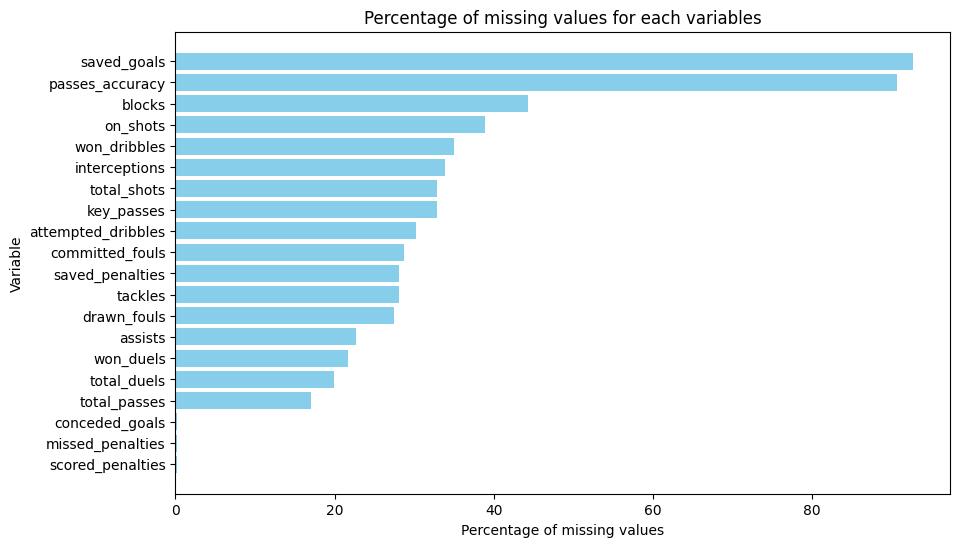

In [41]:
# 1. Analysis of missing values
missing_values = stats_completeness.isnull().sum()  # Numero di valori mancanti per colonna
total_rows = stats_completeness.shape[0]  # Numero totale di righe
missing_percent = (missing_values / total_rows) * 100  # Percentuale di valori mancanti

# 2. Creating a DataFrame with the results
missing_report = pd.DataFrame({
    'Column': stats_completeness.columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)

# Filter only columns with missing values
missing_report = missing_report[missing_report['Missing Values'] > 0]

# 3. Print report
print("Missing values Report:")
print(missing_report)

# 4. Graphical visualization

plt.figure(figsize=(10, 6))
plt.barh(missing_report['Column'], missing_report['Missing Percentage'], color='skyblue')
plt.xlabel('Percentage of missing values')
plt.ylabel('Variable')
plt.title('Percentage of missing values for each variables')
plt.gca().invert_yaxis() 
plt.show()

# Save data

In [42]:
path = 'data'

if not os.path.exists(path):
    os.makedirs(path)

stats_df.to_csv('data/stats.csv')
grades_df.to_csv('data/grades.csv')